In [1]:
from particletracking import dataframes
import filehandling
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = filehandling.open_filename()
data = dataframes.DataStore(file)

In [3]:
corners = data.metadata['boundary']

In [4]:
center = np.mean(corners, axis=0)
vectors = corners - center
angles = np.arctan2(vectors[:, 1], vectors[:, 0])
lengths = np.sqrt(vectors[:, 0]**2 + vectors[:, 1]**2)
new_vectors = np.array([np.cos(angles), np.sin(angles)]).T
new_vectors *= lengths[:, np.newaxis] * 0.8
new_corners = center + new_vectors

NameError: name 'points_to_query' is not defined

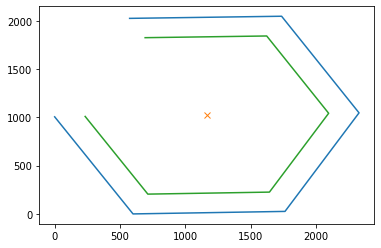

In [5]:
plt.plot(corners[:, 0], corners[:, 1])
plt.plot(center[0], center[1], 'x')
plt.plot(new_corners[:, 0], new_corners[:, 1])
plt.plot(points_to_query[include, 0], points_to_query[include, 1], 'x')
plt.plot(points_to_query[:, 0], points_to_query[:, 1], '.')

In [6]:
from labvision import video, images

In [7]:
vid_file = filehandling.open_filename()
vid = video.ReadVideo(vid_file)
frame = vid.read_next_frame()

In [8]:
metadata = data.metadata

In [9]:
frame = images.crop(frame, metadata['crop'])

In [10]:
import cv2
mask = np.zeros_like(frame, dtype=np.uint8)
cv2.fillPoly(mask, pts=np.array([metadata['boundary']], dtype=np.int32), color=(255, 255, 255))
images.display(mask)

In [11]:
out = cv2.bitwise_and(frame, frame, mask=mask[:, :, 0])

In [24]:
images.display(out)

In [13]:
drawn = images.draw_polygon(out, new_corners, thickness=5)

In [14]:
images.display(drawn)

In [15]:
direc = os.path.split(vid_file)[0]
direc

'/media/data/Data/FirstOrder/Hysterisis/FlatPlate/Trial2'

In [16]:
images.save(drawn, f'{direc}/hex_region.png')

In [17]:
vid.num_frames

25488

In [21]:
frame = vid.read_frame(23000)

In [22]:
frame = images.crop(frame, metadata['crop'])

In [23]:
out = cv2.bitwise_and(frame, frame, mask=mask[:, :, 0])

In [25]:
images.save(out, f'{direc}/hex_region_end.png')